<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025_3_ava/blob/main/FICCD_Claudomiro_ativ_3_1_Multiplicacao_matrizes_Redes_neurais_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 3.1 - Multiplicação de matrizes e Redes neurais
](https://docs.google.com/presentation/d/16n7FEnWr8DN4M3kiq4wxyE1pcu1urpQ90ZhuFyBsHYY/edit?usp=sharing)**

**Belém, 23 de junho de 2025.**

In [271]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados e particiona
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Normalização

# Criação da RN com PyTorch
import torch
import torch.nn.functional as F

# Questões C e D
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Questão F
import torch.nn as nn

#####**A)** *Implemente uma rede neural totalmente conectada com **duas camadas ocultas** e **uma camada de saída**, utilizando PyTorch. Cada camada oculta deve ser representada por uma **matriz 4×4**, e a camada de saída por uma **matriz 4×1**. Utilize a função de ativação **softplus** entre as camadas.*
*A rede deve ser treinada com o **conjunto de dados Iris**, utilizando apenas os atributos **sepal** e **petal length** como entradas, e apenas duas classes: **Setosa** e **Versicolor**.*
1. *Normalize os dados de entrada.*
2. *Use partição simples da base.*
3. *Inicialize três matrizes de pesos conforme explicado em sala.*
4. *Realize a propagação direta (forward pass) usando apenas torch.matmul e torch.nn.functional.softplus*
4. *Utilize o erro quadrático médio com função de perda e SDG como otimizador.*
6. *Compare os resultados com [ch02.ipynb](https://colab.research.google.com/drive/1ONSEFePhUsXewX4ccHEvTj0O4AA7aEcO?usp=sharing)*

Época 100, Loss: 0.0806
Época 200, Loss: 0.0571
Época 300, Loss: 0.0506
Época 400, Loss: 0.0481
Época 500, Loss: 0.0469
Época 600, Loss: 0.0460
Época 700, Loss: 0.0454
Época 800, Loss: 0.0448
Época 900, Loss: 0.0443
Época 1000, Loss: 0.0439
Acurácia do conjunto de teste: 90.00%


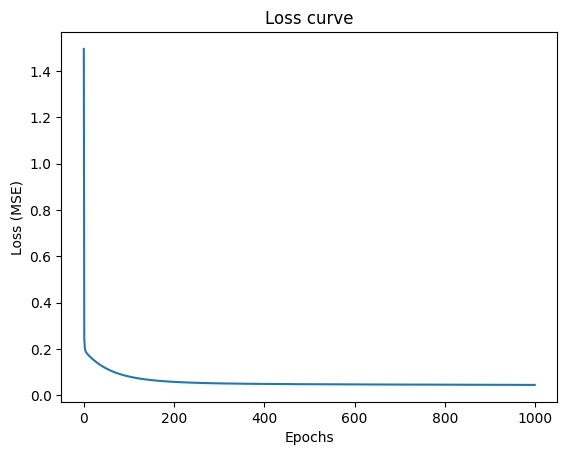

In [272]:
# Carregar o conjunto de dados Iris
iris = load_iris()
# print(iris)

# Entradas: features sepal length (0) e petal length (2)
X = iris.data[:, [0, 2]]
y = iris.target # classes

# Apenas duas classes Setosa (0) e Versicolor (1)
classes = y < 2
X = X[classes]
y = y[classes]

# 1. Normalize os dados de entrada (Min-Max).
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# print(X_normalized)

# 2. Use partição simples da base.
X_train, X_test, y_train, y_test = train_test_split(
  X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Converter arrays para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# 3. Inicialize três matrizes de pesos conforme explicado em sala.
# - Duas camadas ocultas e uma camada de saída.
# - Cada camada oculta deve ser representada por uma matriz 4×4, e a camada de saída por uma matriz 4×1.
torch.manual_seed(42)

# Pesos
peso1 = torch.randn((2, 4), requires_grad=True)  # entrada -> 1ª oculta
peso2 = torch.randn((4, 4), requires_grad=True)  # 1ª oculta -> 2ª oculta
peso3 = torch.randn((4, 1), requires_grad=True)  # 2ª oculta -> saída

# Biases
bias1 = torch.randn((1, 4), requires_grad=True)  # P/ 1ª oculta
bias2 = torch.randn((1, 4), requires_grad=True)  # P/ 2ª oculta
bias3 = torch.randn((1, 1), requires_grad=True)  # P/ saída

# 4. Realize a propagação direta (forward pass) usando apenas torch.matmul e torch.nn.functional.softplus.
def forward(X):
  # Saída para a 1ª camada oculta com a função de ativação softplus
  out_camada1 = F.softplus(torch.matmul(X, peso1) + bias1)
  # Propragação para a 2ª camada oculta com a função de ativação softplus
  out_camada2 = F.softplus(torch.matmul(out_camada1, peso2) + bias2)
  # Saída final com ativação softplus
  output = F.softplus(torch.matmul(out_camada2, peso3) + bias3)
  return output

# 5. Utilize o erro quadrático médio (MSELoss) com função de perda e SDG como otimizador.
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD([peso1, peso2, peso3, bias1, bias2, bias3], lr=0.01)

# Treinamento da RN
losses = []
epochs = 1000

for epoch in range(epochs):
  y_pred = forward(X_train) # forward pass

  loss = loss_fn(y_pred, y_train) # função de perda

  optimizer.zero_grad() # zara os gradientes da iteração anterior

  loss.backward() # backpropagation

  optimizer.step() # atualiza o valor de cada peso

  losses.append(loss.item()) # armazena a perda

  # Exibe as perda a cada 10 épocas
  if (epoch + 1) % 100 == 0:
    print(f'Época {epoch+1}, Loss: {loss.item():.4f}')

# Calcular a acuracy
y_pred_test = forward(X_test)
y_pred_labels = (y_pred_test > 0.5).float()
accuracy = (y_pred_labels == y_test).float().mean()

print(f'Acurácia do conjunto de teste: {accuracy.item() * 100:.2f}%')

# Plotar a curva da perda
plt.plot(losses)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

6 Compare os resultados com ch02.ipynb:

**Modelo:**

* ch02.ipynb: Perceptron e Adaline (1 camada, linear)

* Código: RN com 2 camadas ocultas + 1 camada de saída, não linear

**Bibliotecas:**

* ch02.ipynb: NumPy

* Código: PyTorch

**Pré-processamento:**

* ch02.ipynb: Não normaliza os dados

* Código: Normalização dos dados com MinMaxScaler

**Divisão dos Dados:**

* ch02.ipynb: Seleciona manualamente as classes

* Código: Usa train_test_split

**Função de Ativação:**

* ch02.ipynb: step_function

* Código: Softplus para todas as camadas

**Otimização:**

* ch02.ipynb: Regra do perceptron, calcula manualmente os pesos

* Código: SGD

**Função de Perda:**

* ch02.ipynb: Calcula manualmente a perda, SSE para o Adaline

* Código: Minimiza o erro quadrático médio, MSELoss

**Treinamento**

* ch02.ipynb: Sem backpropagation, cálculo manual dos gradientes

* Código: Backpropagation

**Hiperparâmetros**

* ch02.ipynb: Taxa aprendizado: 0.1 e 10 épocas

* Código: Taxa aprendizado: 0.01 e 2000 épocas
___

**Conclusão:**

O código do ch02.ipynb é bastante didático, permitindo entendimento dos cálculos de forward, perda e atualização dos pesos, mas não é adaptável para redes maiores e mais complexas. Já o código usando PyTorch automatiza o backpropagation e a atualização dos pesos, oferecendo maior eficiência nos problemas reais. No entanto, o uso de PyTorch "esconde" parte dos cálculos importantes e oculta as camadas, dificultando o entendimento da teoria de redes neurais.


#####**B)** *Neste exercício, você continuará utilizando a mesma arquitetura de rede neural e configuração do conjunto de dados do Problema 1:*

* *Duas características de entrada: comprimento da sépala e comprimento da pétala;*

* *Duas classes de saída: setosa e versicolor;*

* *Duas camadas ocultas. Cada camada oculta deve ser representada por uma **matriz 4×4**, e a camada de saída por uma **matriz 4×1**. Utilize a função de ativação **softplus** entre as camadas;*

* *Função de perda: MSELoss.*

*Seu objetivo é treinar a rede utilizando mini-batches, em vez de alimentar a rede com todo o conjunto de dados de uma vez (full batch):*

*Divida o conjunto de dados em 4 lotes (batches).*

*Treine a rede com as operações necessárias incluindo backward() e step() para atualizar os pesos.*




Época 100, Loss: 0.0728
Época 200, Loss: 0.0429
Época 300, Loss: 0.0360
Época 400, Loss: 0.0327
Época 500, Loss: 0.0566
Época 600, Loss: 0.0289
Época 700, Loss: 0.0398
Época 800, Loss: 0.0347
Época 900, Loss: 0.0472
Época 1000, Loss: 0.0291
Acurácia do conjunto de teste: 100.00%


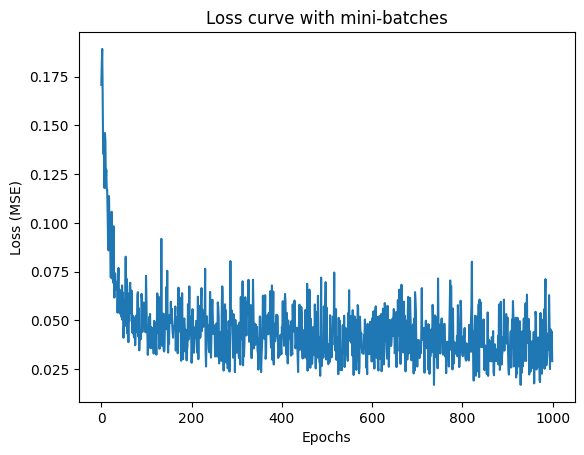

In [273]:
# Carregar o conjunto de dados Iris
iris = load_iris()
# print(iris)

# Entradas: features sepal length (0) e petal length (2)
X = iris.data[:, [0, 2]]
y = iris.target # classes

# Apenas duas classes Setosa (0) e Versicolor (1)
classes = y < 2
X = X[classes]
y = y[classes]

# 1. Normalize os dados de entrada (Min-Max).
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# print(X_normalized)

# 2. Use partição simples da base.
X_train, X_test, y_train, y_test = train_test_split(
  X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Converter arrays para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# 3. Inicialize três matrizes de pesos conforme explicado em sala.
# - Duas camadas ocultas e uma camada de saída.
# - Cada camada oculta deve ser representada por uma matriz 4×4, e a camada de saída por uma matriz 4×1.
torch.manual_seed(42)

# Pesos
peso1 = torch.randn((2, 4), requires_grad=True)  # entrada -> 1ª oculta
peso2 = torch.randn((4, 4), requires_grad=True)  # 1ª oculta -> 2ª oculta
peso3 = torch.randn((4, 1), requires_grad=True)  # 2ª oculta -> saída

# Biases
bias1 = torch.randn((1, 4), requires_grad=True)  # P/ 1ª oculta
bias2 = torch.randn((1, 4), requires_grad=True)  # P/ 2ª oculta
bias3 = torch.randn((1, 1), requires_grad=True)  # P/ saída

# 4. Realize a propagação direta (forward pass) usando apenas torch.matmul e torch.nn.functional.softplus.
def forward(X):
  # Saída para a 1ª camada oculta com a função de ativação softplus
  out_camada1 = F.softplus(torch.matmul(X, peso1) + bias1)
  # Propragação para a 2ª camada oculta com a função de ativação softplus
  out_camada2 = F.softplus(torch.matmul(out_camada1, peso2) + bias2)
  # Saída final com ativação softplus
  output = F.softplus(torch.matmul(out_camada2, peso3) + bias3)
  return output

# 5. Utilize o erro quadrático médio (MSELoss) com função de perda e SDG como otimizador.
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD([peso1, peso2, peso3, bias1, bias2, bias3], lr=0.01)

# 6. Divida o conjunto de dados em 4 lotes (batches).
batch_size = int(len(X_train) / 4)

# Treinamento da RN
losses = []
epochs = 1000

for epoch in range(epochs):
  # Misturar os dados a cada época
  indices = torch.randperm(X_train.size(0))
  X_train_shuffled = X_train[indices]
  y_train_shuffled = y_train[indices]

  for i in range(0, X_train.size(0), batch_size):
    X_batch = X_train_shuffled[i:i + batch_size]
    y_batch = y_train_shuffled[i:i + batch_size]

    y_pred = forward(X_batch) # forward pass

    loss = loss_fn(y_pred, y_batch) # função de perda

    optimizer.zero_grad() # zara os gradientes da iteração anterior

    loss.backward() # backpropagation

    optimizer.step() # atualiza o valor de cada peso

  losses.append(loss.item()) # armazena a perda

  # Exibe as perda a cada 100 épocas
  if (epoch + 1) % 100 == 0:
    print(f'Época {epoch+1}, Loss: {loss.item():.4f}')

# Calcular a acuracy
y_pred_test = forward(X_test)
y_pred_labels = (y_pred_test > 0.5).float()
accuracy = (y_pred_labels == y_test).float().mean()

print(f'Acurácia do conjunto de teste: {accuracy.item() * 100:.2f}%')

# Plotar a curva da perda
plt.plot(losses)
plt.title('Loss curve with mini-batches')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

**Análise:**
* Em cada época, os dados são misturados (torch.randperm), fazendo com que os mini-batches sejam diferentes a cada iteração.
*Não se usa mais o conjunto de dados todo paa atualizar os pesos.
* Em cada época os pesos são atualizados 4x em cada mini-batch.
* O gráfico mostra uma curva bem menos suave que no método de full batch e com oscilações, mas ainda assim é um gráfico descrecente como o primeiro.

**Conclusão:**
* Utilizar mini-batches torna o código mais eficiente quando se usa conjunto de dados grande;
* Os ruídos nos gradientes ajudam a não cair nos mínimos locais;
* Suavização da descida do gradiente;
* Como o processamento ocorre em lotes menores, há redução no uso da memória e acelera o treinamento da base;
* Permitem otimizações na GPU, pois processam operações em lote de forma mais eficiente do que com amostras uma a uma.

#####**C)**

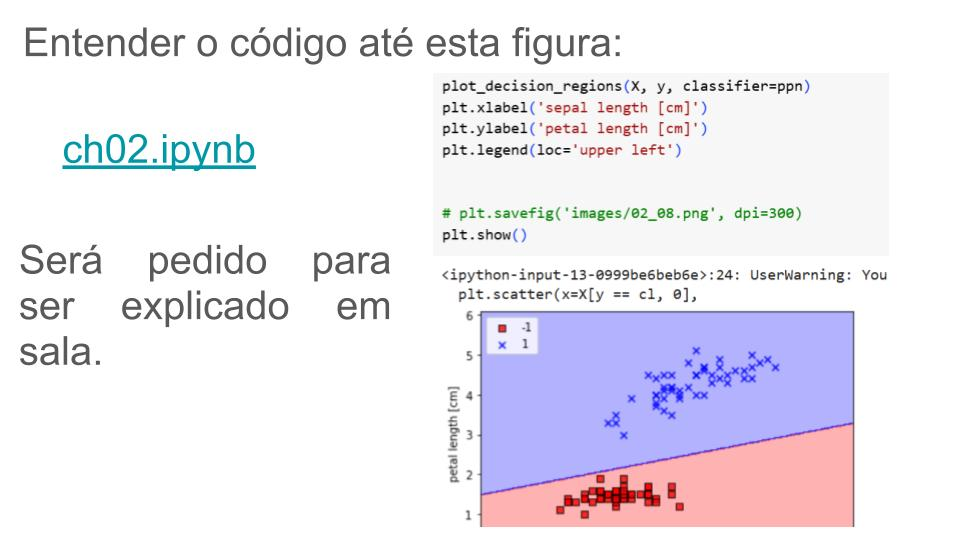

Esquema dos pontos abordados até a figura acima:

1. Chapter 2 - Training Machine Learning Algorithms for Classification
2. Artificial neurons - a brief glimpse into the early history of machine learning
3. CÓDIGO: Implementing a perceptron learning algorithm in Python
* An object-oriented perceptron API
* Training a perceptron model on the Iris dataset
  * Reading-in the Iris data
  * Plotting the Iris data
  * Training the perceptron model
  * A function for plotting decision regions


Resumo:
* O código implementou um Perceptron simples.

* Utilizou o dataset Iris.

* Foram usadas duas classes (setosa e versicolor) e duas features (sepal length e petal length) como entrada.

* É realizado o treinamento do modelo e mostra os erros por época também.

* Foi plotado um gráfico de dispersão para visualizar as classes separadas linearmente.


#####**D)**

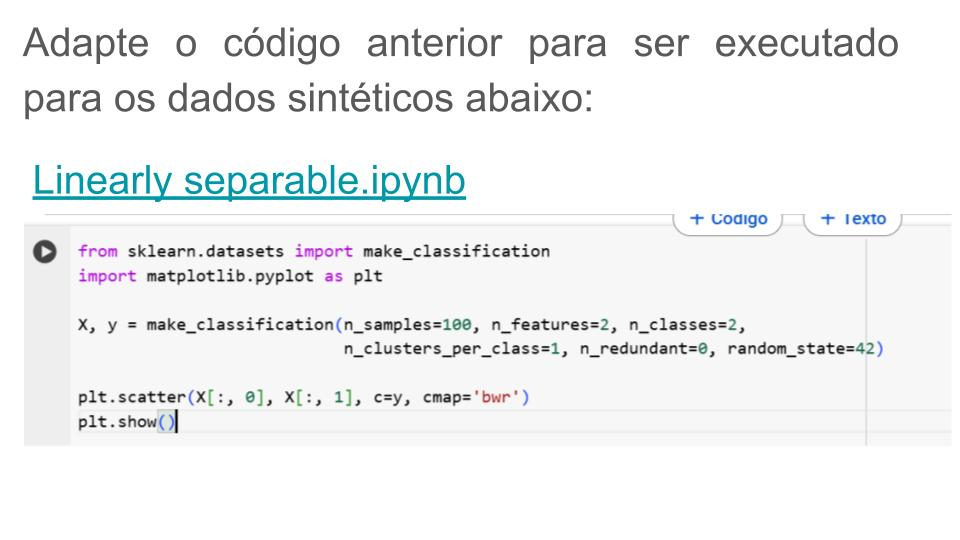

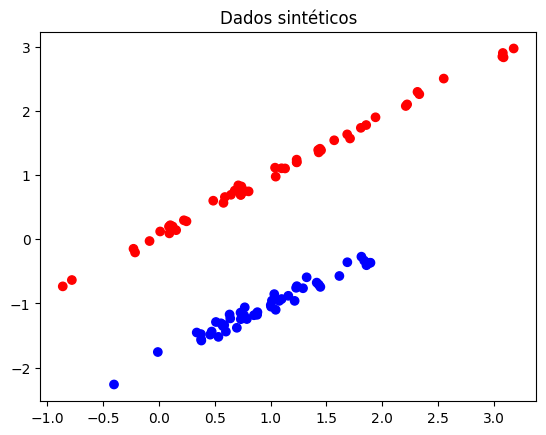

In [274]:
# Dados sintéticos - Linearly separable
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                            n_clusters_per_class=1, n_redundant=0, random_state=42)

# Plotando os dados sintéticos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Dados sintéticos')
plt.show()

In [275]:
# 3. CÓDIGO do Perceptron: Implementing a perceptron learning algorithm in Python

# An object-oriented perceptron API
class Perceptron:
  def __init__(self, eta=0.1, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    # Calculate net input
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    # Return class label after unit step
    return np.where(self.net_input(X) >= 0.0, 1, -1)

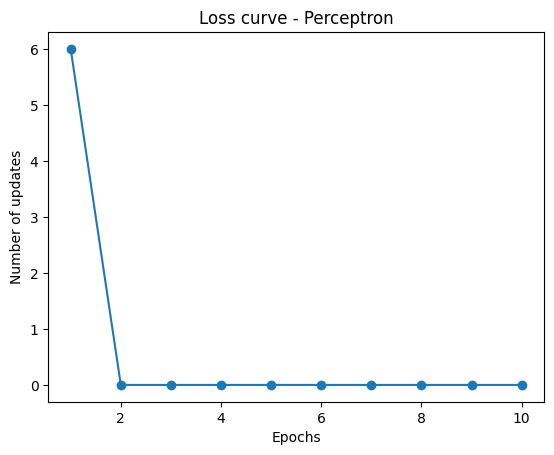

In [276]:
# Tranformar os rótulos para -1 e 1 (no perceptron clássico é necessário)
y = np.where(y == 0, -1, 1)

# Training the perceptron model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Loss curve - Perceptron')
plt.show()

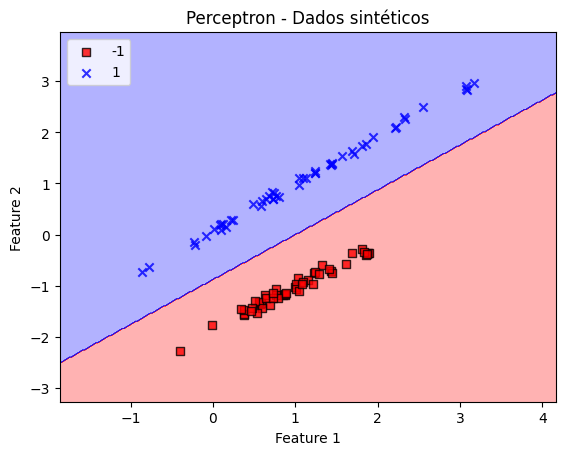

In [277]:
# A function for plotting decision regions

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron - Dados sintéticos')
plt.legend(loc='upper left')
plt.show()

**Análise:**

* O primeiro gráfico mostra a distribuição linear dos dados sintéticos.

* O segundo gráfico mostra o ajuste da curva de perda do Perceptron para os dados sintéticos.

* O terceiro gráfico mostra as regiões de decisão geradas pelo Perceptron, mostrando a separação das duas classes.

#####**E)** [Gradient Descent, Step-by-Step](https://docs.google.com/presentation/d/1x4k4c_8HuL8V8XAyddGNX-v5Jka7UE9TzXxXz6gDalo/edit?usp=sharing)

*Transforme em código Python o procedimento do slide 301 ao slide 325. O código deve rodar até o final, ou seja, até a condição de parada.
Após finalizado o código acima e extraídos seus resultados, adapte o código para ele rodar como o Gradiente Descendente Estocástico. Compare os resultados.*


Step 9: Intercept = 0.1075, Slope = 0.9982, Loss = 0.9219
Step 19: Intercept = 0.1992, Slope = 0.9603, Loss = 0.8239
Step 29: Intercept = 0.2806, Slope = 0.9257, Loss = 0.7460
Step 39: Intercept = 0.3532, Slope = 0.8948, Loss = 0.6841
Step 49: Intercept = 0.4179, Slope = 0.8672, Loss = 0.6349
Step 59: Intercept = 0.4755, Slope = 0.8426, Loss = 0.5958
Step 69: Intercept = 0.5269, Slope = 0.8207, Loss = 0.5648
Step 79: Intercept = 0.5727, Slope = 0.8012, Loss = 0.5401
Step 89: Intercept = 0.6135, Slope = 0.7838, Loss = 0.5205
Step 99: Intercept = 0.6499, Slope = 0.7683, Loss = 0.5049
Step 109: Intercept = 0.6824, Slope = 0.7545, Loss = 0.4925
Step 119: Intercept = 0.7113, Slope = 0.7422, Loss = 0.4827
Step 129: Intercept = 0.7371, Slope = 0.7312, Loss = 0.4749
Step 139: Intercept = 0.7601, Slope = 0.7214, Loss = 0.4686
Step 149: Intercept = 0.7806, Slope = 0.7127, Loss = 0.4637
Step 159: Intercept = 0.7988, Slope = 0.7049, Loss = 0.4598
Step 169: Intercept = 0.8151, Slope = 0.6980, Loss 

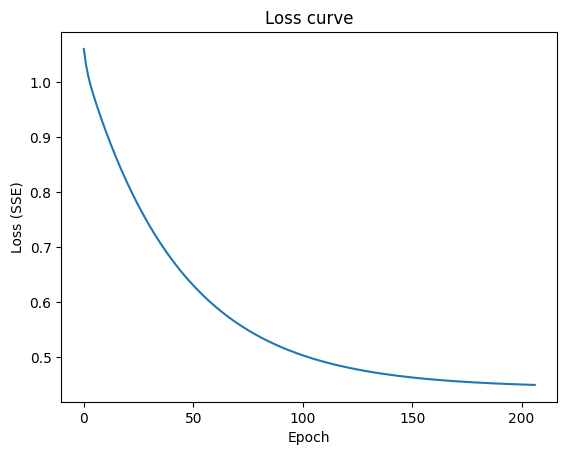

In [278]:
# Código com gradiente descendente batch

# Dados do exemplo
X = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

# Hiperparâmetros do slides
learning_rate = 0.01
lim_steps = 1000
lim_parada = 0.001

# Dados da inicialização
intercept = 0.0
slope = 1.0

# Armazena dados
intercepts = []
slopes = []
losses = []

# Função de perda SSE
def compute_loss(X, y, intercept, slope):
  return np.sum((y - (intercept + slope * X)) ** 2)

# Gradiente descendente
for step in range(lim_steps):
  # Cálculo do gradiente
  d_intercept = -2 * np.sum(y - (intercept + slope * X))
  d_slope = -2 * np.sum(X * (y - (intercept + slope * X)))

  # Cálculo do step
  step_size_intercept = d_intercept * learning_rate
  step_size_slope = d_slope * learning_rate

  # Atualiza od parâmetros
  new_intercept = intercept - step_size_intercept
  new_slope = slope - step_size_slope

  # Cálculo da perda
  loss = compute_loss(X, y, intercept, slope)

  # Armazena o histórico dos daods
  intercepts.append(intercept)
  slopes.append(slope)
  losses.append(loss)

  # Exibe as perda a cada 10 épocas
  plt.title('Loss curve')
  if (step + 1) % 10 == 0:
    print(f"Step {step}: Intercept = {intercept:.4f}, Slope = {slope:.4f}, Loss = {loss:.4f}")

  # Condição de parada
  if abs(step_size_intercept) < lim_parada and abs(step_size_slope) < lim_parada:
    print(f"\nCondição de parada no step {step}")
    break

  intercept, slope = new_intercept, new_slope

print(f"\nLast intercept: {intercept:.4f}")
print(f"Last slope: {slope:.4f}")
print(f"Last loss: {compute_loss(X, y, intercept, slope):.4f}")

# Plotar a curva da perda
plt.plot(losses)
plt.title('Loss curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (SSE)')
plt.show()

Step 99: Intercept = 0.2543, Slope = 0.9518, Loss = 0.7784
Step 199: Intercept = 0.4457, Slope = 0.7851, Loss = 0.6670
Step 299: Intercept = 0.6166, Slope = 0.7378, Loss = 0.5398
Step 399: Intercept = 0.7843, Slope = 0.7806, Loss = 0.5359
Step 499: Intercept = 0.8168, Slope = 0.6884, Loss = 0.4569
Step 599: Intercept = 0.8856, Slope = 0.7106, Loss = 0.4740
Step 699: Intercept = 0.8977, Slope = 0.7165, Loss = 0.4880
Step 799: Intercept = 0.8873, Slope = 0.6563, Loss = 0.4485

Condição de parada no step 867

Last intercept: 0.9552
Last slope: 0.7687
Last loss: 0.6815


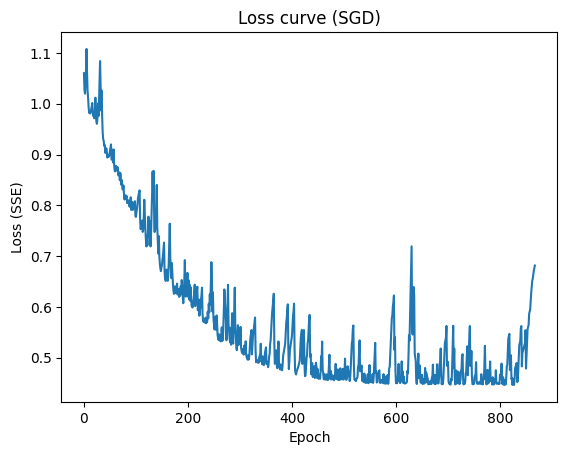

In [279]:
# Código com gradiente descendente estocástico

# Dados do exemplo
X = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

# Hiperparâmetros dos slides
learning_rate = 0.01
lim_steps = 1000
lim_parada = 0.001

# Dados da inicialização
intercept = 0.0
slope = 1.0

# Armazena dados
intercepts = []
slopes = []
losses = []

# Função de perda SSE
def compute_loss(X, y, intercept, slope):
  return np.sum((y - (intercept + slope * X)) ** 2)

# Gradiente descendente estocástico
rng = np.random.default_rng(42)

for step in range(lim_steps):
  # Seleciona um índice aleatório
  idx = rng.integers(0, len(X))

  # Seleciona uma amostra
  xi = X[idx]
  yi = y[idx]

  # Cálculo do gradiente pra uma única amostra
  d_intercept = -2 * (yi - (intercept + slope * xi))
  d_slope = -2 * xi * (yi - (intercept + slope * xi))

  # Cálculo do step
  step_size_intercept = d_intercept * learning_rate
  step_size_slope = d_slope * learning_rate

  # Atualiza od parâmetros
  new_intercept = intercept - step_size_intercept
  new_slope = slope - step_size_slope

  # Cálculo da perda considerando todo o dataset
  loss = compute_loss(X, y, intercept, slope)

  # Armazena o histórico dos daods
  intercepts.append(intercept)
  slopes.append(slope)
  losses.append(loss)

  # Exibe as perdas a cada 100 épocas
  if (step + 1) % 100 == 0:
    print(f"Step {step}: Intercept = {intercept:.4f}, Slope = {slope:.4f}, Loss = {loss:.4f}")

  # Condição de parada
  if abs(step_size_intercept) < lim_parada and abs(step_size_slope) < lim_parada:
    print(f"\nCondição de parada no step {step}")
    break

  intercept, slope = new_intercept, new_slope

print(f"\nLast intercept: {intercept:.4f}")
print(f"Last slope: {slope:.4f}")
print(f"Last loss: {compute_loss(X, y, intercept, slope):.4f}")

# Plotar a curva da perda
plt.plot(losses)
plt.title('Loss curve (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss (SSE)')
plt.show()

*Compare os resultados.*

No código do **Gradiente descendente batch** a convergência pra parada ocore de maneira mais rápida no step 206. A perda é menor (loss=0.4498). É mais estável, pois usa todos os pontos do dataset a cada iteração.
Intercept e slop mais precisos. A curva de perda desce suavemente e continuamente até estabilizar.

Já no **Gradiente descendente estocástico** a convergência ocorre somente no step 867, devido à variação existente pela escolha aleatória das amostras. A perda é maior (loss=0.6815). Intercepto e slope razoáveis.
É mais rápido computacionalmente em datasets grandes, pois usa apenas uma amostra por iteração. A curva de perda tem oscilações por causa da aleatoriedade na escolha das amostras, mas também tende a decrescer.

**Conclusão:**

Como o dataset usado é pequeno, o Gradiente descendente batch é mais eficiente, já que nesse caso o custo computacional é irrelevante.

O Gradiente descendente estocástico funciona bem, mas é menos eficiente e mais ruidoso pra esse dataset. Ele é mais útil e melhor quando se trabalha com um dataset muito grande.

#####**F)**

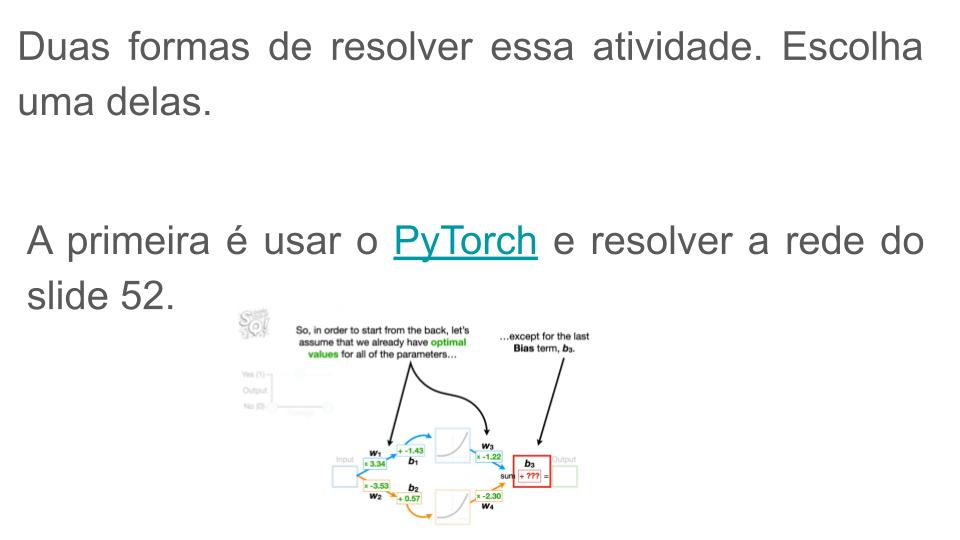

In [297]:
# Pesos
peso1 = torch.tensor(3.34)
peso2 = torch.tensor(-3.53)
peso3 = torch.tensor(-1.22)
peso4 = torch.tensor(-2.30)

# Bias
bias1 = torch.tensor(-1.43)
bias2 = torch.tensor(0.57)
bias3 = torch.tensor(0.0, requires_grad=True)

# Tensor para ser treinado: b3
optimizer = torch.optim.SGD([bias3], lr=0.1)

# output final = 0
criterio = nn.MSELoss()

# Entrada e alvo
input_x = torch.tensor(0.0)
target = torch.tensor(1.0)

print(f"b3 inicial = {bias3.item()}")

for epoch in range(100):
    # Zera os gradientes da iteração anterior
    optimizer.zero_grad()

    # Forward pass
    output_1 = torch.sigmoid(input_x * peso1 + bias1)
    output_2 = torch.sigmoid(input_x * peso2 + bias2)
    output_3 = output_1 * peso3 + output_2 * peso4 + bias3

    # Função de perda
    loss = criterio(output_3, target)

    # Backpropagation: calcular o gradiente para b3
    loss.backward()

    # Atualiza o valor de b3 com base no gradiente
    optimizer.step()

    # Exibe as perdas
    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}, Loss: {loss.item()}, b3: {bias3.item()}")

print(f"\nb3 = {bias3.item():.2f}")

b3 inicial = 0.0
Época [10, Loss: 0.13178598880767822, b3: 2.4143168926239014
Época [20, Loss: 0.0015193759463727474, b3: 2.6735522747039795
Época [30, Loss: 1.751489980961196e-05, b3: 2.701387643814087
Época [40, Loss: 2.020846210371019e-07, b3: 2.704375982284546
Época [50, Loss: 2.3079707034412422e-09, b3: 2.7046971321105957
Época [60, Loss: 2.6275870368408505e-11, b3: 2.7047314643859863
Época [70, Loss: 1.2789769243681803e-13, b3: 2.704735279083252
Época [80, Loss: 1.2789769243681803e-13, b3: 2.704735279083252
Época [90, Loss: 1.2789769243681803e-13, b3: 2.704735279083252
Época [100, Loss: 1.2789769243681803e-13, b3: 2.704735279083252

b3 = 2.70


**Análise do código**

O código mostrou como um único parâmetro (b3) pode ser ajustado via backpropagation em uma RN.

O código usa a equação forward pass com pesos e biases e uma única variável, bias3.

Foi escolhido um alvo incialmente sendo target = 1 e usando a entrada = 0. Então a diferença entre a saída e o alvo deve ser a menor possível. A função MSELoss mede o quadrado dessa diferença.

o PyTorch calcula (loss.backward()) automaticamente para que lado e com que intensidade o b3 deve ser ajustado para diminuir o erro (cálculo do gradiente).

O optimizer.step() faz um pequeno ajuste no valor de bias3.

O chute inicial para o b3 foi 0.
